<a href="https://colab.research.google.com/github/drica-monteiro/intro_estat/blob/main/monte_carlo_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

We want to compute $$I = \int_a^bh(x)dx$$ using a probabilistic integration. Note that $$\int_a^bh(x)dx = \int_a^bh(x)\cdot\frac{1}{b-a}\cdot (b-a)dx = (b-a)\int_a^bh(x)f(x)dx$$ where $f(x) = 1/(b-a)$ is the density of a uniform random variable in the interval $(a,b)$. It means that
$$I = (b-a)\mathbb{E}h(X)$$ where $X\sim Unif(a,b)$.

By the Law of Large Numbers, we know $$\frac{1}{N}\sum_{i=1}^nh(X_i)\to \mathbb{E}h(X)  \text{ in probability.}$$
Then, for large $N$, it is reasonable to compute $I$ as the empirical sum:
$$I ≈ (b-a)\frac{1}{N}\sum_{i=1}^nh(X_i)$$.


In [ ]:
def mc_int(func,
                a=0,
                b=1,
                n=1000):
    """
    Monte Carlo integration
    """

    vals = np.random.uniform(a, b, n)
    u_func = [func(y) for y in vals]

    y_mean = np.sum(u_func)/n
    integ = (b-a) * y_mean

    return integ, vals

In [ ]:
def func1(x):
    # function f(x)=x^2
    return x**2

In [ ]:
def func1_int(a, b):
    # analytical solution to integral of f(x)
    return (1/3)*(b**3-a**3)

In [ ]:
print(f"Monte Carlo solution: {mc_int(func1, -2, 2, 500)[0]: .4f}")
print(f"Analytical solution: {func1_int(-2, 2): .4f}")

Monte Carlo solution:  5.2459
Analytical solution:  5.3333


In [ ]:
a = -2
b = 2

In [ ]:
x = np.linspace(a, b, 10)
y = func1(x)
_, vals = mc_int(func1, -2, 2, 50)
y_vals = func1(vals)

In [ ]:
y_vals = np.zeros(vals.shape[0])

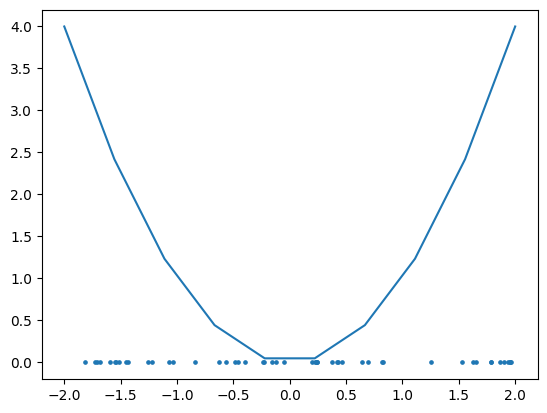

In [ ]:
plt.plot(x, y)
plt.scatter(vals, y_vals, s = 5.5)
plt.show()